# Introduction to Machine Learning Evaluation Metrics

In machine learning, evaluating the performance of models is crucial to ensure their effectiveness and reliability. Different metrics are used depending on the type of problem (classification or regression). Below are some common evaluation metrics we will be discussing:

## Classification Algorithm Metrics
1. **Accuracy**: The ratio of correctly predicted instances to the total instances.
2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
3. **Recall and F1 Score**: 
   - Recall: The ratio of correctly predicted positive observations to all the observations in the actual class.
   - F1 Score: The weighted average of Precision and Recall.
4. **ROC-AUC**: Receiver Operating Characteristic - Area Under Curve. It represents the probability that the model ranks a random positive instance higher than a random negative instance.
5. **Log Loss**: Also known as logistic loss or cross-entropy loss, it evaluates the performance of a classification model where the prediction input is a probability value between 0 and 1.

## Regression Algorithm Metrics
1. **MAE, MSE & RMSE**: 
   - MAE (Mean Absolute Error): The average of the absolute errors.
   - MSE (Mean Squared Error): The average of the squared errors.
   - RMSE (Root Mean Squared Error): The square root of the average of squared differences between prediction and actual observation.
2. **R² (R-Squared) or Coefficient of Determination**: It provides an indication of how well the model's predictions approximate the real data points.

Understanding and correctly applying these metrics is essential for building robust machine learning models and interpreting their results effectively. Each metric provides different insights, and often multiple metrics are used in combination to get a comprehensive understanding of model performance.


=============================================================================================================================

## Classification Metrics: Accuracy

In [19]:
import pandas as pd

In [20]:
def accuracy(y_true, y_pred): 
    """ 
    Function to calculate accuracy 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score 
    """ 
    # initialize a simple counter for correct predictions 
    correct_counter = 0 
    # loop over all elements of y_true 
    # and y_pred "together" 
    for yt, yp in zip(y_true, y_pred): 
        if yt == yp: 
            # if prediction is equal to truth, increase the counter 
            correct_counter += 1 
 
    # return accuracy 
    # which is correct predictions over the number of samples 
    return correct_counter / len(y_true) 

In [21]:
def true_positive(y_true, y_pred): 
    """ 
    Function to calculate True Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true positives 
    """ 
    # initialize 
    tp = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 1 and yp == 1: 
            tp += 1 
    return tp 
 
def true_negative(y_true, y_pred): 
    """ 
    Function to calculate True Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true negatives 
    """ 
    # initialize 
    tn = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 0 and yp == 0: 
            tn += 1 
    return tn 
 
def false_positive(y_true, y_pred): 
    """ 
    Function to calculate False Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false positives 
    """ 
    # initialize 
    fp = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 0 and yp == 1: 
            fp += 1 
    return fp 
 
def false_negative(y_true, y_pred): 
    """ 
    Function to calculate False Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false negatives 
    """ 
    # initialize 
    fn = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 1 and yp == 0: 
            fn += 1 
    return fn

In [22]:
def accuracy_v2(y_true, y_pred): 
    """ 
    Function to calculate accuracy using tp/tn/fp/fn 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

=============================================================================================================================

## Classification Metrics: Precision

In [23]:
def precision(y_true, y_pred): 
    """ 
    Function to calculate precision 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: precision score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    precision = tp / (tp + fp) 
    return precision 

=============================================================================================================================

## Classification Metrics: Recall

In [24]:
def recall(y_true, y_pred): 
    """ 
    Function to calculate recall 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: recall score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    recall = tp / (tp + fn) 
    return recall

In [25]:
# actual targets 
y_true = [0, 0, 0, 0, 1, 0, 1,  
          0, 0, 1, 0, 1, 0, 0, 1] 
 
# predicted probabilities of a sample being 1 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,  
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,  
          0.85, 0.15, 0.99] 
 
# handmade thresholds 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0] 

In [26]:
tps = []
fps = []
tns = []
fns = []
# for every threshold, calculate predictions in binary 
# and append calculated precisions and recalls 
# to their respective lists 
for i in thresholds: 
    temp_prediction = [1 if y >= i else 0 for y in y_pred] 
    # p = precision(y_true, temp_prediction) 
    # r = recall(y_true, temp_prediction) 
    tp = true_positive(y_true, temp_prediction)
    fp = false_positive(y_true, temp_prediction)
    tn = true_negative(y_true, temp_prediction)
    fn = false_negative(y_true, temp_prediction)
    # precisions.append(p) 
    # recalls.append(r)
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)
    # number of true positives
    

# create the dataframe with thresholds, precisions, and recalls
df_confusion_metrix = pd.DataFrame({'Thresholds': thresholds, 
                                      'TruePositive': tps,'FalsePositive': fps,
                                      'TrueNegative': tns,'FalseNegative': fns})

In [27]:
df_confusion_metrix["recall"] = df_confusion_metrix["TruePositive"] / (df_confusion_metrix["TruePositive"] + df_confusion_metrix["FalseNegative"])
df_confusion_metrix["precision"] = df_confusion_metrix["TruePositive"] / (df_confusion_metrix["TruePositive"] + df_confusion_metrix["FalsePositive"])
df_confusion_metrix["FalsePositiveRatio"] = df_confusion_metrix["FalsePositive"] / (df_confusion_metrix["FalsePositive"] + df_confusion_metrix["TrueNegative"])

# add F1 score to the dataframe
df_confusion_metrix["f1_score"] = 2 * (df_confusion_metrix["precision"] * df_confusion_metrix["recall"]) / (df_confusion_metrix["precision"] + df_confusion_metrix["recall"])


In [28]:
# Import the graph_objects module from the Plotly library
import plotly.graph_objects as go

# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_metrix DataFrame to two decimal places
df_confusion_metrix_graph = df_confusion_metrix.round(2)

# Add a line plot to the figure for the Recall metric
# The x values are the threshold values, and the y values are the Recall scores
fig.add_trace(go.Scatter(x=df_confusion_metrix_graph['Thresholds'], y=df_confusion_metrix_graph['recall'], mode='lines+markers', name='Recall'))

# Add a line plot to the figure for the Precision metric
# The x values are the threshold values, and the y values are the Precision scores
fig.add_trace(go.Scatter(x=df_confusion_metrix_graph['Thresholds'], y=df_confusion_metrix_graph['precision'], mode='lines+markers', name='Precision'))

# Add a line plot to the figure for the F1 Score metric
# The x values are the threshold values, and the y values are the F1 Score scores
fig.add_trace(go.Scatter(x=df_confusion_metrix_graph['Thresholds'], y=df_confusion_metrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))

# Update the layout of the figure, setting the title of the figure and the titles of the x and y axes
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

## Classification Metrics: ROC (Receiver Operating Characteristic) and AUC

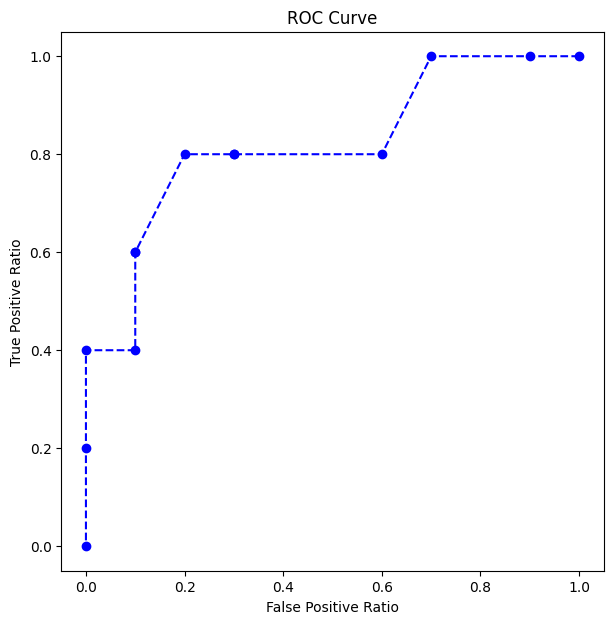

auc is 0.83


In [29]:
# plot ROC curve
import matplotlib.pyplot as plt
df_confusion_metrix_graph = df_confusion_metrix.round(2)
plt.figure(figsize=(7, 7))
plt.plot(df_confusion_metrix_graph["FalsePositiveRatio"], df_confusion_metrix_graph["recall"], marker='o', linestyle='--', color='b')
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.show()

# calculate the auc score
from sklearn.metrics import roc_auc_score
# Compute the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) from prediction scores.
# roc_auc_score uses a set of thresholds to calculate the score. The thresholds are determined internally based on the values in y_pred.
# y_pred is the probability estimates of the positive class (i.e., the probability that a sample is classified as positive).
auc = roc_auc_score(y_true, y_pred)

# print auc with 2 decimal points
print(f"auc is {round(auc, 2)}")

In [30]:
# calculate the area under the curve
from sklearn.metrics import auc
# FalsePositiveRatio is the x-axis and recall is the y-axis and both values are calculated based on the thresholds defined in the process.
auc = auc(df_confusion_metrix["FalsePositiveRatio"], df_confusion_metrix["recall"])
print(round(auc, 2))

0.82


### Evaluation of Models Using AUC and Threshold Selection Using F1 Score:

- AUC for Model Evaluation: AUC (Area Under the ROC Curve) is a key metric used to evaluate the performance of binary classification models. A higher AUC indicates a model with better discriminative ability between positive and negative classes. Therefore, when comparing different models, the one with the highest AUC is typically selected as the best-performing model.

- F1 Score for Threshold Selection: Once the best model is selected based on AUC, the next step is to determine the optimal threshold for making predictions. The F1 score, which is the harmonic mean of precision and recall, is used for this purpose. The threshold that maximizes the F1 score is chosen, ensuring a balance between precision and recall and leading to the best practical performance of the model.

### Use cases from other side
* Recall vs Precision: Best for imbalanced datasets where the positive class is rare (e.g., fraud detection, medical diagnosis).
* ROC: When the classes are roughly balanced, and overall performance

=============================================================================================================================

## Calssification Metrics: Log-Loss
$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Where:
$$
\begin{align*}
N & \text{ is the number of samples.} \\
y_i & \text{ is the actual label of the } i \text{-th sample (0 or 1).} \\
p_i & \text{ is the predicted probability of the } i \text{-th sample being in class 1.}
\end{align*}
$$


Why Log Loss?
* Probabilistic Predictions: Log loss considers the confidence of predictions by using the predicted probabilities, not just the final binary decision.
* Penalization: It heavily penalizes wrong predictions that are made with high confidence. For example, predicting a probability close to 1 when the actual class is 0 results in a high log loss.

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Convert to a binary classification problem (Class 2 vs. Rest)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate Log-Loss
logloss = log_loss(y_test, y_pred)
print(f'Log-Loss: {logloss:.4f}')

Log-Loss: 0.1051


=============================================================================================================================

## Regression Metrics: MAE, MSE, and RMSE

### Mean Absolute Error (MAE)
The Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and the actual values. It gives an idea of how wrong the predictions were on average.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

Where:
- \( y_i \) is the actual value.
- \( \hat{y}_i \) is the predicted value.
- \( n \) is the number of observations.

### Mean Squared Error (MSE)
The Mean Squared Error (MSE) is the average of the squared differences between the predicted values and the actual values. It penalizes larger errors more than smaller ones, making it useful for situations where large errors are particularly undesirable.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

### Root Mean Squared Error (RMSE)
The Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between the predicted values and the actual values. It provides an idea of the magnitude of the error, combining both the advantages of MAE and MSE.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
$$

### Summary
- **MAE**: Measures the average magnitude of the errors in a set of predictions, without considering their direction.
- **MSE**: Measures the average of the squares of the errors, which means it penalizes larger errors more than smaller ones.
- **RMSE**: Measures the square root of the average of the squared errors, providing a metric that is in the same units as the original data.

These metrics are fundamental for evaluating the performance of regression models and help in understanding how well the model predicts the target variable.


Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 2.61
Root Mean Squared Error (RMSE): 1.62


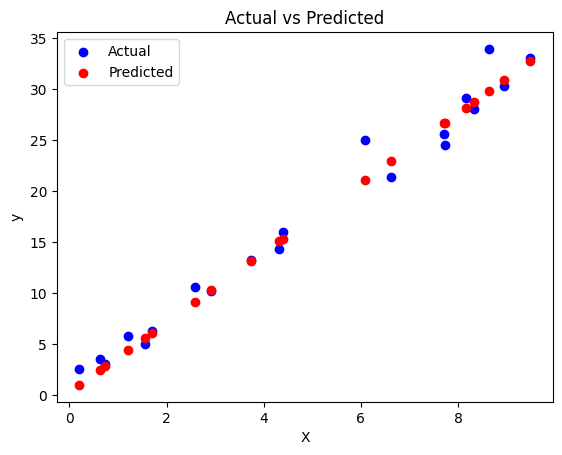

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a dummy dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 3.5 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

=============================================================================================================================

## Regression Metrics: R-squared (R²) Coefficient of Determination
$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:
$$
\begin{align*}
\text{SS}_{\text{res}} & \text{ is the residual sum of squares:} \\
\text{SS}_{\text{res}} & = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \\ 
\text{SS}_{\text{tot}} & \text{ is the total sum of squares:} \\
\text{SS}_{\text{tot}} & = \sum_{i=1}^{N} (y_i - \bar{y})^2 \\
y_i & \text{ is the actual value.} \\
\hat{y}_i & \text{ is the predicted value.} \\
\bar{y} & \text{ is the mean of the actual values.} \\
N & \text{ is the number of observations.}
\end{align*}
$$

- **Total Variance**: This represents the overall variability in the data, measured by the total sum of squares (SS_tot). It indicates how much the data points deviate from the mean of the dependent variable.
- **Explained Variance**: This represents the portion of the total variance that is explained by the model. It reduces the uncertainty in predicting the dependent variable.
- **Residual Variance**: This represents the portion of the variance that is not explained by the model, measured by the residual sum of squares (SS_res).

By understanding these components, we can better interpret the R-squared value and the effectiveness of our regression model in explaining the variability in the data.


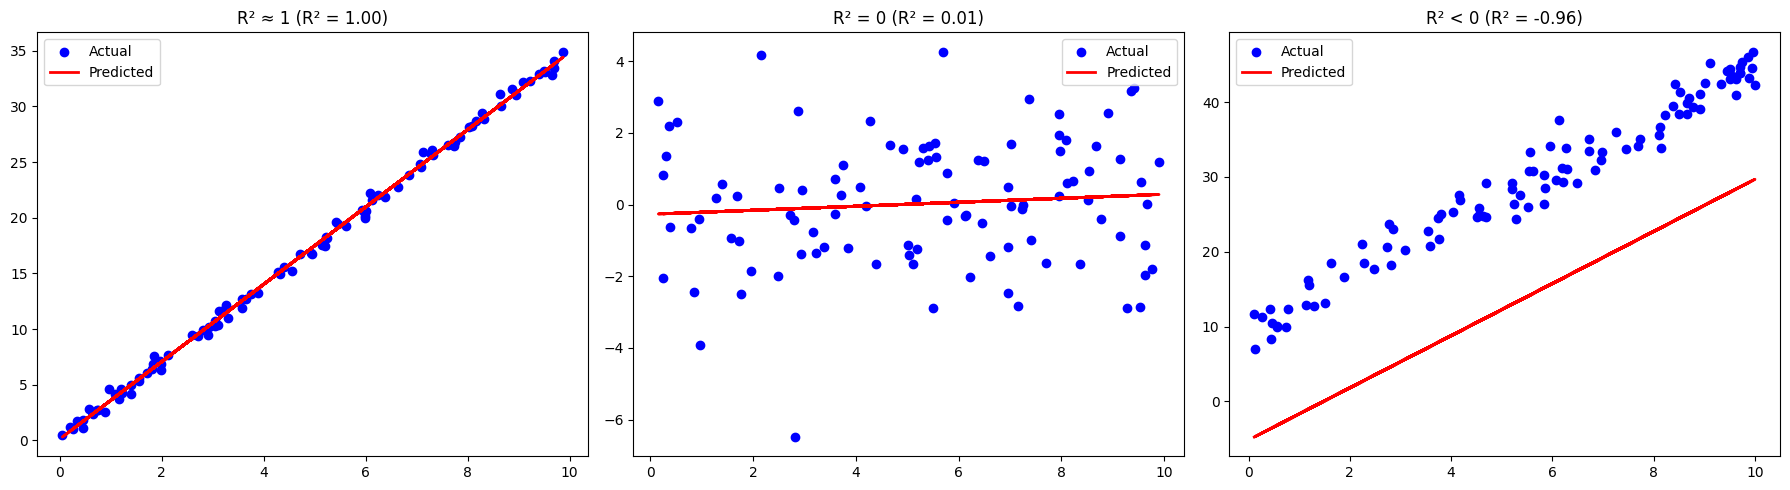

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to plot the results
def plot_results(X, y, y_pred, title, ax):
    ax.scatter(X, y, color='blue', label='Actual')
    ax.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
    ax.set_title(title)
    ax.legend()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Case 1: R² is almost 1
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10
y1 = 3.5 * X1.squeeze() + np.random.randn(100) * 0.5  # Very low noise
model1 = LinearRegression()
model1.fit(X1, y1)
y1_pred = model1.predict(X1)
r2_1 = r2_score(y1, y1_pred)
plot_results(X1, y1, y1_pred, f'R² ≈ 1 (R² = {r2_1:.2f})', axs[0])

# Case 2: R² is 0
X2 = np.random.rand(100, 1) * 10
y2 = np.random.randn(100) * 2  # Random noise
model2 = LinearRegression()
model2.fit(X2, y2)
y2_pred = model2.predict(X2)
r2_2 = r2_score(y2, y2_pred)
plot_results(X2, y2, y2_pred, f'R² = 0 (R² = {r2_2:.2f})', axs[1])

# Case 3: R² < 0
X3 = np.random.rand(100, 1) * 10
y3 = 3.5 * X3.squeeze() + 10 + np.random.randn(100) * 2  # Add a bias to the data
model3 = LinearRegression()
model3.fit(X3, y3)
y3_pred = model3.predict(X3)
# To ensure R² is less than 0, we add a strong negative bias to predictions
y3_pred_bias = y3_pred - 15  # Introduce significant bias to make R² < 0
r2_3 = r2_score(y3, y3_pred_bias)
plot_results(X3, y3, y3_pred_bias, f'R² < 0 (R² = {r2_3:.2f})', axs[2])

plt.tight_layout()
plt.show()


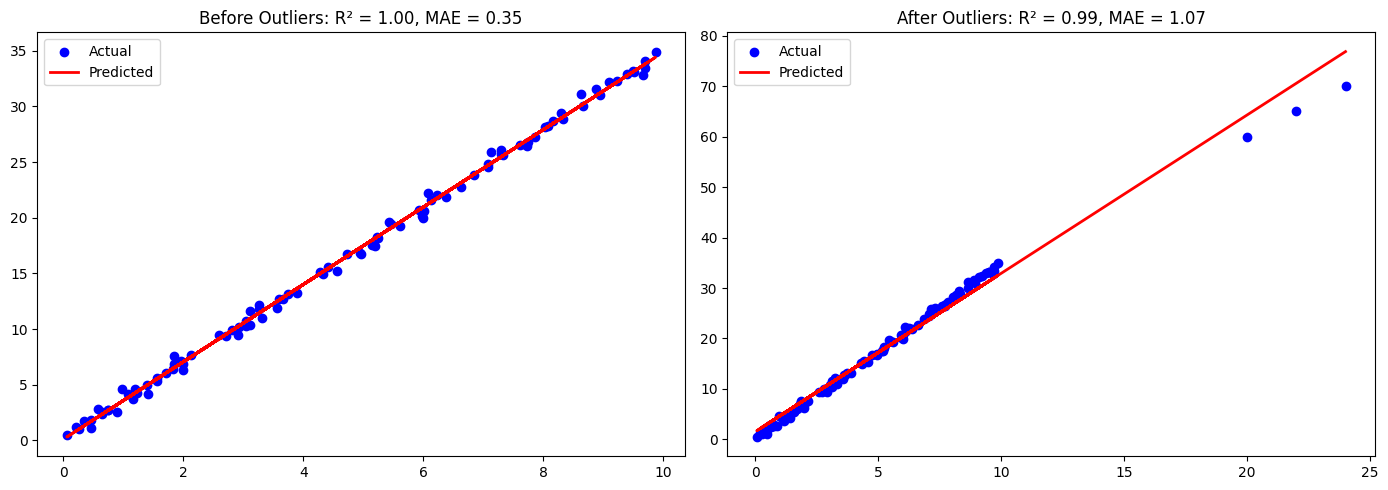

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Function to plot the results
def plot_results(X, y, y_pred, title, ax):
    ax.scatter(X, y, color='blue', label='Actual')
    ax.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
    ax.set_title(title)
    ax.legend()

# Create a dummy dataset
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10
y1 = 3.5 * X1.squeeze() + np.random.randn(100) * 0.5  # Very low noise

# Train a simple linear regression model
model1 = LinearRegression()
model1.fit(X1, y1)
y1_pred = model1.predict(X1)

# Calculate R² and MAE before adding outliers
r2_1 = r2_score(y1, y1_pred)
mae_1 = mean_absolute_error(y1, y1_pred)

# Add three outliers
X1_outliers = np.append(X1, [[20], [22], [24]])
y1_outliers = np.append(y1, [60, 65, 70])

# Train a new linear regression model with outliers
model1_outliers = LinearRegression()
model1_outliers.fit(X1_outliers.reshape(-1, 1), y1_outliers)
y1_pred_outliers = model1_outliers.predict(X1_outliers.reshape(-1, 1))

# Calculate R² and MAE after adding outliers
r2_1_outliers = r2_score(y1_outliers, y1_pred_outliers)
mae_1_outliers = mean_absolute_error(y1_outliers, y1_pred_outliers)

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

plot_results(X1, y1, y1_pred, f'Before Outliers: R² = {r2_1:.2f}, MAE = {mae_1:.2f}', axs[0])
plot_results(X1_outliers, y1_outliers, y1_pred_outliers, f'After Outliers: R² = {r2_1_outliers:.2f}, MAE = {mae_1_outliers:.2f}', axs[1])

plt.tight_layout()
plt.show()


The insight of R2 is that it is much more robust for outliers compared to MAE, MSE and RMSE